# STOCK MARKET PREDICTION USING DIFFERENT MODELS 

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import chart_studio.plotly as cs
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")

# for evaluating the model 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

from statsmodels.tsa.api import SimpleExpSmoothing

# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# building our model 
from sklearn.model_selection import train_test_split

# for normalizing dataset 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Creation of Linear Model 
from sklearn.linear_model import LinearRegression

from tensorflow.keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler

### Attributes
#### Date: (datetime) ID. Consists of dates (only weekdays)
#### Open: (double) The price of the stock at the time trading began every day
#### High: (double) The highest price of the stock in a day during trading hours
#### Low: (double) The lowest price of the stock in a day during trading hours
#### Volume: (int) The volume of stocks traded on that day
#### Close: (double) The price of the stock at the time trading closes every day

# Data Analysis:

In [2]:
df = pd.read_csv("TSLA.csv")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       928 non-null    object 
 1   Open       928 non-null    float64
 2   High       928 non-null    float64
 3   Low        928 non-null    float64
 4   Close      928 non-null    float64
 5   Adj Close  928 non-null    float64
 6   Volume     928 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 50.9+ KB


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
1,2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
2,2019-03-07,18.589333,18.980000,18.283333,18.439333,18.439333,141637500
3,2019-03-08,18.460667,19.039333,18.392668,18.942667,18.942667,132294000
4,2019-03-11,18.901333,19.418667,18.700001,19.394667,19.394667,110884500


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       928 non-null    datetime64[ns]
 1   Open       928 non-null    float64       
 2   High       928 non-null    float64       
 3   Low        928 non-null    float64       
 4   Close      928 non-null    float64       
 5   Adj Close  928 non-null    float64       
 6   Volume     928 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 50.9 KB


In [6]:
# f - formatted string literal 
print(f'Dataframe contains stock prices between {df.Date.min()}{df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days}days')

Dataframe contains stock prices between 2019-03-05 00:00:002022-11-04 00:00:00
Total days = 1340days


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,928.000000,928.000000,928.000000,928.000000,928.000000,9.280000e+02
mean,165.363279,169.213483,161.159661,165.269708,165.269708,1.342636e+08
std,117.543647,120.163980,114.532294,117.338134,117.338134,9.624344e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,34.004667,35.050500,33.181333,34.528999,34.528999,7.262692e+07
50%,201.061668,206.756668,198.451668,201.708336,201.708336,9.997470e+07
75%,259.524170,265.494163,254.614167,259.439171,259.439171,1.609208e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Processing  :

In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Since there are no missing values no need to perform cleaning 

## Data Visualization :

### 1.Box Plot of Dataset 

<AxesSubplot:>

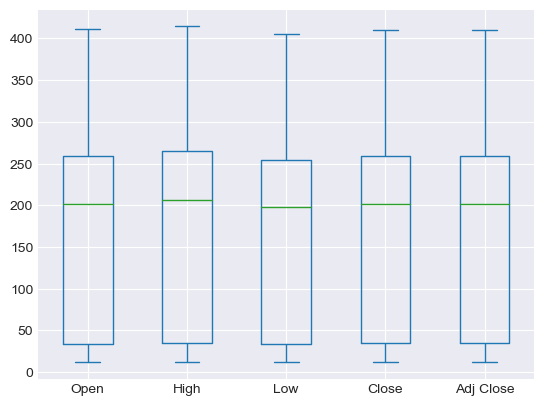

In [9]:
# box plot visualization 
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

### 2.Heat Map

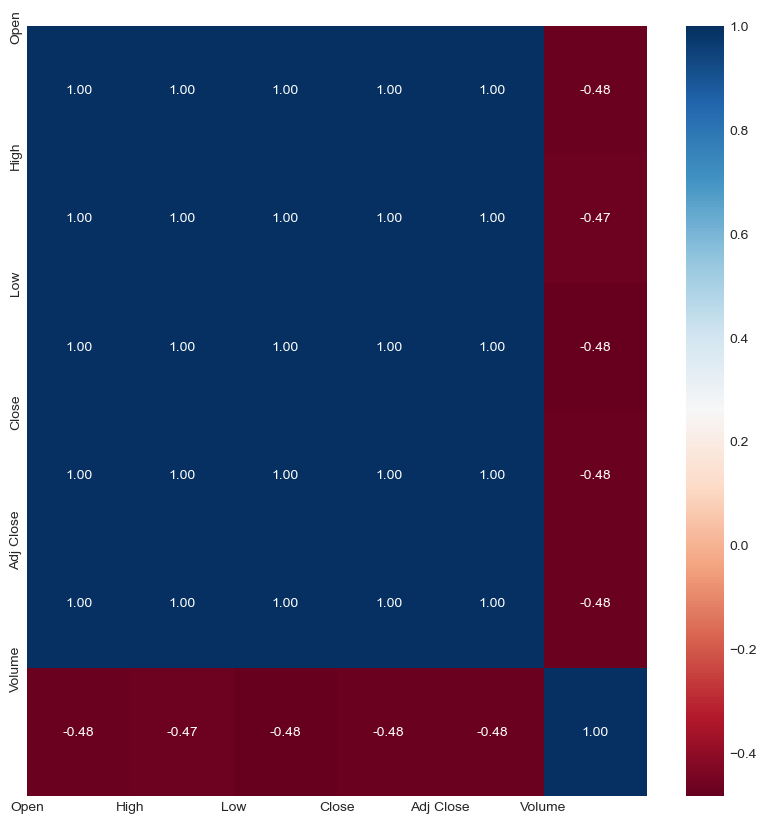

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### 3.Scatter Plot

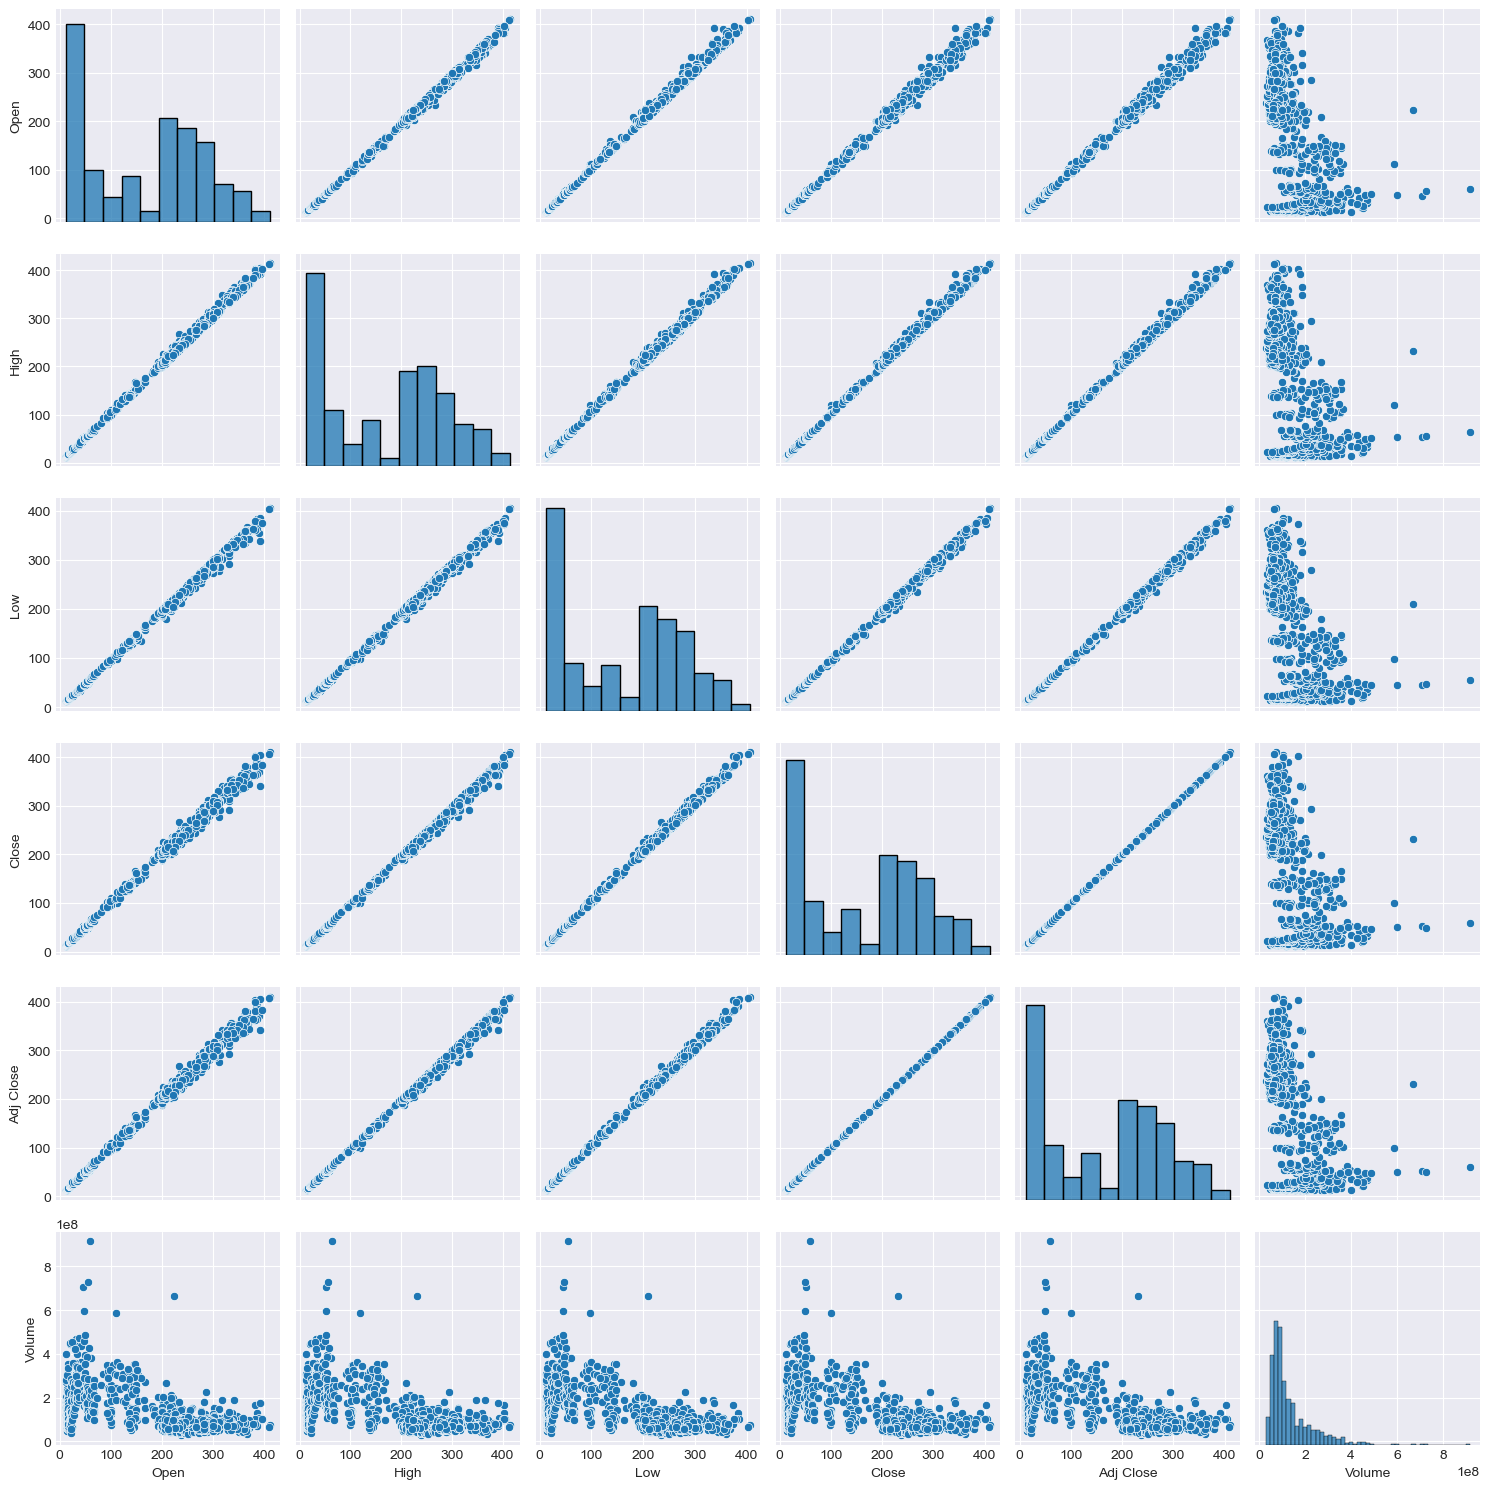

In [11]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

#### Therefore , from the above plots we can see that volume has scattered values and all others open ,close ,low and high have a linear relationship.

####  Hence we leave volume behind and use others for prediction

In [12]:
def get_corelated_col(col_corel, threshold): 
  # Col_corel to be column along which corelation to be measured 
  # Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(col_corel.index):
    if abs(col_corel[index]) > threshold:
      feature.append(index)
      value.append(col_corel[index])

  df = pd.DataFrame(data = value, index = feature, columns=['correlation value'])
  return df

In [13]:
# Measuring the corelation of close column with other columns
corelated_values = get_corelated_col(corr['Close'], 0.60)
corelated_values

,correlation value
Open,0.998278
High,0.999217
Low,0.999304
Close,1.000000
Adj Close,1.000000


In [14]:
df = df[corelated_values.index]
df.head()

,Open,High,Low,Close,Adj Close
0,18.799999,18.933332,18.006666,18.436001,18.436001
1,18.431999,18.767332,18.292667,18.416000,18.416000
2,18.589333,18.980000,18.283333,18.439333,18.439333
3,18.460667,19.039333,18.392668,18.942667,18.942667
4,18.901333,19.418667,18.700001,19.394667,19.394667


In [15]:
df.shape

(928, 5)

### Finally plotting Variation of stock price during specific time peroid

In [17]:
df = pd.read_csv("TSLA.csv")

layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)

tesla_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)
iplot(plot)

---
---

# MODEL 1 : Simple Moving Average (SMA)

In [18]:
df2 = pd.read_csv("TSLA.csv",index_col='Date')
df2 = df2.set_index(pd.DatetimeIndex(df2.index.values))
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 928 entries, 2019-03-05 to 2022-11-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       928 non-null    float64
 1   High       928 non-null    float64
 2   Low        928 non-null    float64
 3   Close      928 non-null    float64
 4   Adj Close  928 non-null    float64
 5   Volume     928 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 50.8 KB


In [19]:
# Create function for calculating Simple Moving Average (SMA)
def SMA(data, period=30, column='Adj Close'):
    return data[column].rolling(window=period).mean()

In [20]:
# Create two new columns to store the 10 day and 50 day SMA
df['SMA10'] = SMA(df, 10)
df['SMA50'] = SMA(df, 50)

In [21]:
# Get buy and sell signals
df['Signal'] = np.where(df['SMA10'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Adj Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Adj Close'], np.NAN)

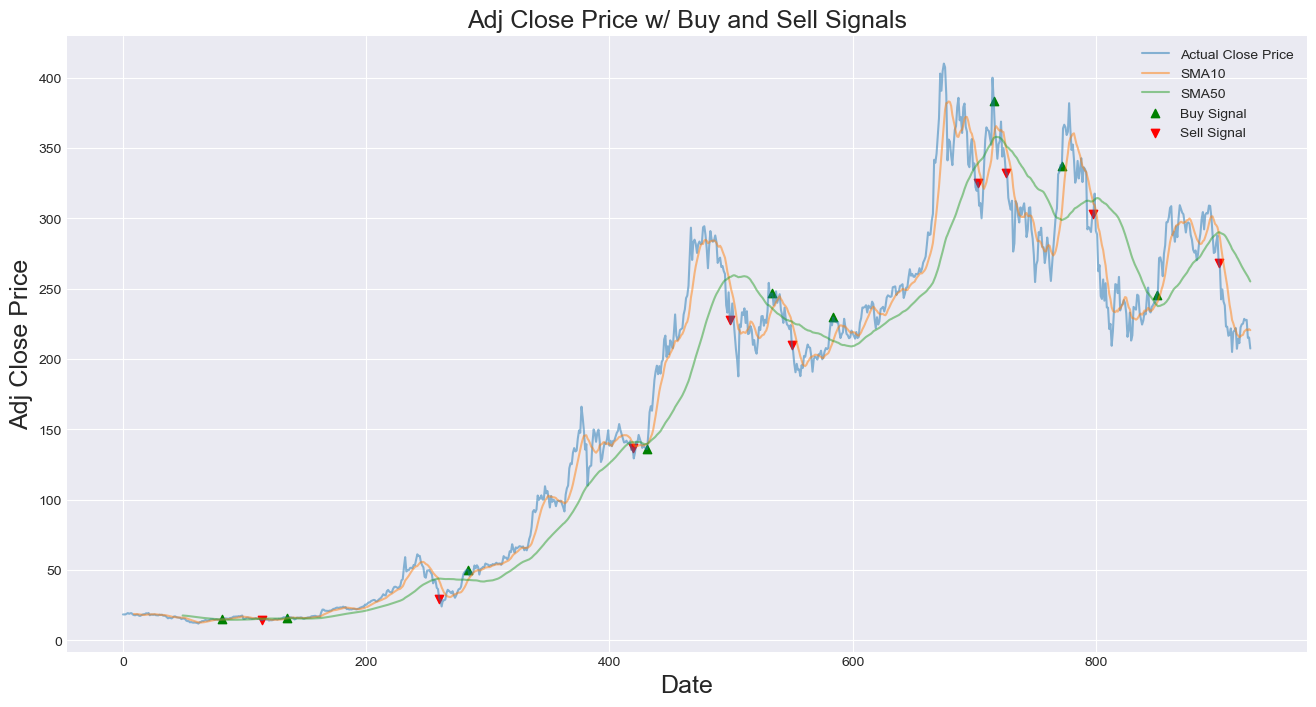

In [22]:
# Visualize the close price with SMA also Buy and Sell Signals
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], alpha=0.5, label='Actual Close Price')
plt.plot(df['SMA10'], alpha=0.5, label='SMA10')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')

# Make buy or sell signal
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')

# Adding text into the visualization
plt.title('Adj Close Price w/ Buy and Sell Signals', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)

# Give legend
plt.legend()

# Show the graph
plt.show()

***
---

# MODEL 2 : Exponential Moving Average (EMA)

Test RMSE: 90.27
Test MAPE: 0.243


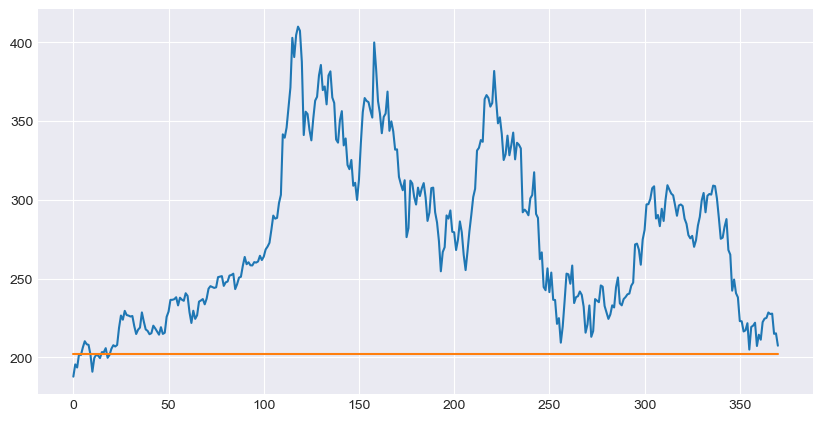

In [23]:
X = df[['Close']].values
train_split = 0.6
split_idx= int(np.ceil(len(X)*train_split))
train = X[:split_idx]
test = X[split_idx:]
test_concat = np.array([]).reshape((0,1))

for i in range(len(test)):
    train_fit = np.concatenate((train, np.asarray (test_concat)))
    fit = SimpleExpSmoothing (np.asarray(train_fit)).fit(smoothing_level=0.2)
    test_pred = fit.forecast (1)
    test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))

print('Test RMSE: %.2f' % mean_squared_error(test, test_concat, squared=False))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_concat)
plt.show()

# MODEL 3 : Support Vector Machine (SVM)

In [24]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
1,2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
2,2019-03-07,18.589333,18.980000,18.283333,18.439333,18.439333,141637500
3,2019-03-08,18.460667,19.039333,18.392668,18.942667,18.942667,132294000
4,2019-03-11,18.901333,19.418667,18.700001,19.394667,19.394667,110884500
...,...,...,...,...,...,...,...
923,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
924,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
925,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
926,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800


In [25]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df
  
# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
2019-03-07,18.589333,18.980000,18.283333,18.439333,18.439333,141637500
2019-03-08,18.460667,19.039333,18.392668,18.942667,18.942667,132294000
2019-03-11,18.901333,19.418667,18.700001,19.394667,19.394667,110884500
...,...,...,...,...,...,...
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300


### Here we are taking Explainatory or independent variables are used to predict.
### Here X is a datasetused for prediction. Here it contains 'Open-Close' and 'High-Low' variables.
### These are the indicators based on which the algorithm will predict tomorrow's trend.

In [26]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2019-03-05,0.363998,0.926666
2019-03-06,0.015999,0.474665
2019-03-07,0.150000,0.696667
2019-03-08,-0.482000,0.646665
2019-03-11,-0.493334,0.718666


### The target variable is the outcome which the machine learning model will predict based on the explanatory variables. 
### Here y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict.
### Here if tomorrow's price is greater than today's we'll signal '1' or else '0'

In [27]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,

### We will split data into training and test data sets. 
### This is done so that we can evaluate the effectiveness of the model in the test dataset.
### Here we are considering 80% of data as training data set

In [28]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

### We will use SVC() function from sklearn.svm.SVC library to create our classifier model using the fit() method on the training data set.

In [29]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [30]:
df['Predicted_Signal'] = cls.predict(X)

In [31]:
df['Return'] = df.Close.pct_change()

In [32]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [33]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500,0.363998,0.926666,1,NaN,NaN,NaN
2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500,0.015999,0.474665,1,-0.001085,-0.001085,-0.001085
2019-03-07,18.589333,18.980000,18.283333,18.439333,18.439333,141637500,0.150000,0.696667,1,0.001267,0.001267,0.000182
2019-03-08,18.460667,19.039333,18.392668,18.942667,18.942667,132294000,-0.482000,0.646665,1,0.027297,0.027297,0.027479
2019-03-11,18.901333,19.418667,18.700001,19.394667,19.394667,110884500,-0.493334,0.718666,1,0.023861,0.023861,0.051340
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,-1.349991,7.910004,1,-0.004289,-0.004289,3.343303
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,6.229996,10.119995,1,0.001231,0.001231,3.344533
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,11.059997,13.049988,1,-0.056360,-0.056360,3.288173


In [34]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500,0.363998,0.926666,1,NaN,NaN,NaN,NaN
2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500,0.015999,0.474665,1,-0.001085,-0.001085,-0.001085,-0.001085
2019-03-07,18.589333,18.980000,18.283333,18.439333,18.439333,141637500,0.150000,0.696667,1,0.001267,0.001267,0.000182,0.000182
2019-03-08,18.460667,19.039333,18.392668,18.942667,18.942667,132294000,-0.482000,0.646665,1,0.027297,0.027297,0.027479,0.027479
2019-03-11,18.901333,19.418667,18.700001,19.394667,19.394667,110884500,-0.493334,0.718666,1,0.023861,0.023861,0.051340,0.051340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,-1.349991,7.910004,1,-0.004289,-0.004289,3.343303,4.434112
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,6.229996,10.119995,1,0.001231,0.001231,3.344533,4.435343
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,11.059997,13.049988,1,-0.056360,-0.056360,3.288173,4.378983


# Ploting prediction :

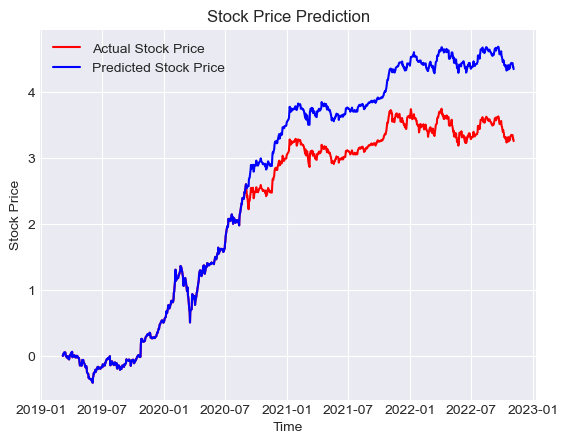

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'], color = 'red', label = 'Actual Stock Price')
plt.plot(df['Cum_Strategy'], color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Model 4 : Recurrent Nueral Network (RNN) Model

In [37]:
df = pd.read_csv("Pearson_train.csv")
test_df = pd.read_csv("Pearson_test.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [38]:
pearson_close = df['Close']
pearson_close.reset_index(drop=True,inplace=True)
pearson_close.shape

(1655,)

In [39]:
pearson_close =pd.DataFrame(pearson_close)

In [40]:
train=pearson_close.iloc[0:1620]
test=pearson_close.iloc[1620: ]

In [41]:
scaler= MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
test.shape

(35, 1)

In [42]:
length = 35 # As we have 35 days of test data
batch_size = 32 # We are splitting ,it can be any value generally 32 works well. 
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length ,batch_size = batch_size)
# Here we are creating an object with train - length and last 55 values will be predicted and validated

In [43]:
no_features = 1

model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,no_features))) # 30 is number of layers
model.add(Dropout(rate=0.2)) # Helps you not to overfit the model
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse') # Backpropagating and error type

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(generator,epochs=100,shuffle=False)

Epoch 1/100
50/50 [==============================] - 3s 11ms/step - loss: 0.0164
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 0.0159
Epoch 3/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0134
Epoch 4/100
50/50 [==============================] - 1s 12ms/step - loss: 0.0162
Epoch 5/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0102
Epoch 6/100
50/50 [==============================] - 1s 11ms/step - loss: 0.0100
Epoch 7/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0070
Epoch 8/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0061
Epoch 9/100
50/50 [==============================] - 1s 11ms/step - loss: 0.0050
Epoch 10/100
50/50 [==============================] - 1s 11ms/step - loss: 0.0041
Epoch 11/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0040
Epoch 12/100
50/50 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 13/100
50/50 [=====

<AxesSubplot:>

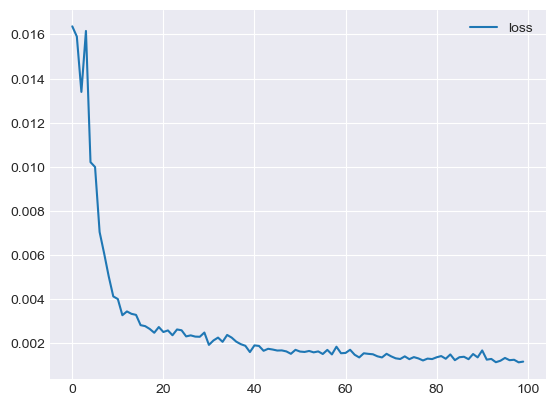

In [46]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [47]:
batch1 = scaled_train[-length:] # picks last 35 values in train set.
batch1

array([[0.94779926],
       [0.93459269],
       [0.89501073],
       [0.91121022],
       [0.88586482],
       [0.86113957],
       [0.89080987],
       [0.85385412],
       [0.85771525],
       [0.86476882],
       [0.89573874],
       [0.86003408],
       [0.83778406],
       [0.83632804],
       [0.83097855],
       [0.81954616],
       [0.81524822],
       [0.83295765],
       [0.82638941],
       [0.74455074],
       [0.67794627],
       [0.65284354],
       [0.64672289],
       [0.67549262],
       [0.65694734],
       [0.65258469],
       [0.67775753],
       [0.71160711],
       [0.71809446],
       [0.70204597],
       [0.7297102 ],
       [0.70333481],
       [0.71259397],
       [0.70608505],
       [0.70067084]])

In [48]:
batch1 = batch1.reshape((1,length,1))
batch1

array([[[0.94779926],
        [0.93459269],
        [0.89501073],
        [0.91121022],
        [0.88586482],
        [0.86113957],
        [0.89080987],
        [0.85385412],
        [0.85771525],
        [0.86476882],
        [0.89573874],
        [0.86003408],
        [0.83778406],
        [0.83632804],
        [0.83097855],
        [0.81954616],
        [0.81524822],
        [0.83295765],
        [0.82638941],
        [0.74455074],
        [0.67794627],
        [0.65284354],
        [0.64672289],
        [0.67549262],
        [0.65694734],
        [0.65258469],
        [0.67775753],
        [0.71160711],
        [0.71809446],
        [0.70204597],
        [0.7297102 ],
        [0.70333481],
        [0.71259397],
        [0.70608505],
        [0.70067084]]])

In [49]:
model.predict(batch1)

1/1 [==============================] - 0s 465ms/step


array([[0.76527935]], dtype=float32)

In [50]:
# first prediction value for batch 1
scaled_test[0] 

array([0.68292367])

In [51]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,no_features))
for i in range (len(test)):
    current_pred =model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 41ms/step


In [52]:
test_predictions

[array([0.76527935], dtype=float32),
 array([0.7939112], dtype=float32),
 array([0.83025146], dtype=float32),
 array([0.85850406], dtype=float32),
 array([0.897452], dtype=float32),
 array([0.9255079], dtype=float32),
 array([0.98326135], dtype=float32),
 array([1.0276582], dtype=float32),
 array([1.0549973], dtype=float32),
 array([1.0831716], dtype=float32),
 array([1.10631], dtype=float32),
 array([1.1321568], dtype=float32),
 array([1.1522871], dtype=float32),
 array([1.1630722], dtype=float32),
 array([1.1640114], dtype=float32),
 array([1.1747643], dtype=float32),
 array([1.1766554], dtype=float32),
 array([1.180914], dtype=float32),
 array([1.1826495], dtype=float32),
 array([1.1745418], dtype=float32),
 array([1.1640998], dtype=float32),
 array([1.1462533], dtype=float32),
 array([1.1273178], dtype=float32),
 array([1.1076443], dtype=float32),
 array([1.088509], dtype=float32),
 array([1.069116], dtype=float32),
 array([1.049327], dtype=float32),
 array([1.0336342], dtype=float

In [53]:
actual_price_predictions =scaler.inverse_transform(test_predictions)
actual_price_predictions

array([[2506.63872599],
       [2559.73308563],
       [2627.12169369],
       [2679.51275309],
       [2751.73703383],
       [2803.76334535],
       [2910.86017631],
       [2993.18885762],
       [3043.88593943],
       [3096.13176285],
       [3139.03915626],
       [3186.96901748],
       [3224.29819995],
       [3244.29787896],
       [3246.0393843 ],
       [3265.9793773 ],
       [3269.48626239],
       [3277.38338562],
       [3280.60156723],
       [3265.5668806 ],
       [3246.20341032],
       [3213.10928235],
       [3177.9955564 ],
       [3141.51347326],
       [3106.02925189],
       [3070.06732133],
       [3033.3710317 ],
       [3004.27056145],
       [2965.3756158 ],
       [2934.87716639],
       [2905.52535168],
       [2874.38140905],
       [2844.86799999],
       [2812.54050574],
       [2783.28330443]])

In [54]:
test['predictions'] = actual_price_predictions
test

,Close,predictions
1620,2353.92,2506.638726
1621,2329.17,2559.733086
1622,2267.25,2627.121694
1623,2270.55,2679.512753
1624,2297.91,2751.737034
1625,2276.98,2803.763345
1626,2265.27,2910.860176
1627,2338.82,2993.188858
1628,2324.87,3043.885939
1629,2358.71,3096.131763


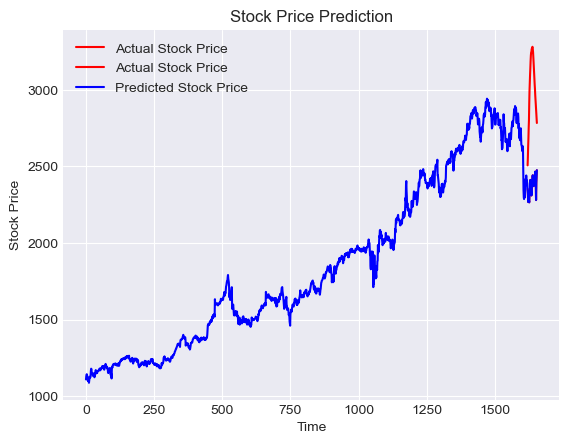

In [55]:
plt.plot(test, color = 'red', label = 'Actual Stock Price')
plt.plot(pearson_close, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Model 5 : Long Short Term Memory Model

In [56]:
data = pd.read_csv("Pearson_train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [57]:
data['Close']

0       1109.64
1       1125.85
2       1133.04
3       1143.37
4       1122.88
         ...   
1650    2402.95
1651    2280.27
1652    2395.54
1653    2434.89
1654    2474.93
Name: Close, Length: 1655, dtype: float64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1655 non-null   object 
 1   Open    1655 non-null   float64
 2   High    1655 non-null   float64
 3   Low     1655 non-null   float64
 4   Close   1655 non-null   float64
 5   Volume  1655 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 77.7+ KB


In [59]:
data = data.dropna()                       # droping not availible data.
train_data = data.iloc[:,4:5].values       # Keeping only closing columns.{iloc = indexlocation}
                                           # here it changes close dataset into float if it is some other.
print(train_data)
print(train_data.shape)

[[1109.64]
 [1125.85]
 [1133.04]
 ...
 [2395.54]
 [2434.89]
 [2474.93]]
(1655, 1)


In [60]:
scaler = MinMaxScaler(feature_range=(0,1))      # rescaling data into 0 or 1.
train_data = scaler.fit_transform(train_data)   # Transforming data using fit.
train_data.shape                                # Printing shape of dataset.

(1655, 1)

In [61]:
X_train = []
Y_train = []

for i in range (60,248):
    X_train.append(train_data[i-60:i,0])
    Y_train.append(train_data[i,0])

X_train,Y_train = np.array(X_train),np.array(Y_train)

In [62]:
print(X_train.shape)
print(Y_train.shape)

(188, 60)
(188,)


In [63]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # takig 3d for LSTM.
X_train.shape

(188, 60, 1)

In [64]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [65]:
result = model.fit(X_train,Y_train,epochs = 30,batch_size = 32,verbose=2)

Epoch 1/30
6/6 - 34s - loss: 0.0018 - 34s/epoch - 6s/step
Epoch 2/30
6/6 - 4s - loss: 4.4955e-04 - 4s/epoch - 597ms/step
Epoch 3/30
6/6 - 4s - loss: 2.8926e-04 - 4s/epoch - 614ms/step
Epoch 4/30
6/6 - 3s - loss: 2.3898e-04 - 3s/epoch - 553ms/step
Epoch 5/30
6/6 - 3s - loss: 2.0326e-04 - 3s/epoch - 518ms/step
Epoch 6/30
6/6 - 4s - loss: 1.9720e-04 - 4s/epoch - 711ms/step
Epoch 7/30
6/6 - 3s - loss: 1.9303e-04 - 3s/epoch - 556ms/step
Epoch 8/30
6/6 - 3s - loss: 1.8740e-04 - 3s/epoch - 500ms/step
Epoch 9/30
6/6 - 3s - loss: 1.9645e-04 - 3s/epoch - 434ms/step
Epoch 10/30
6/6 - 3s - loss: 1.7568e-04 - 3s/epoch - 471ms/step
Epoch 11/30
6/6 - 3s - loss: 1.6973e-04 - 3s/epoch - 442ms/step
Epoch 12/30
6/6 - 3s - loss: 1.5410e-04 - 3s/epoch - 437ms/step
Epoch 13/30
6/6 - 3s - loss: 1.4480e-04 - 3s/epoch - 426ms/step
Epoch 14/30
6/6 - 2s - loss: 1.4941e-04 - 2s/epoch - 384ms/step
Epoch 15/30
6/6 - 2s - loss: 1.4914e-04 - 2s/epoch - 393ms/step
Epoch 16/30
6/6 - 3s - loss: 1.3727e-04 - 3s/epoch - 4

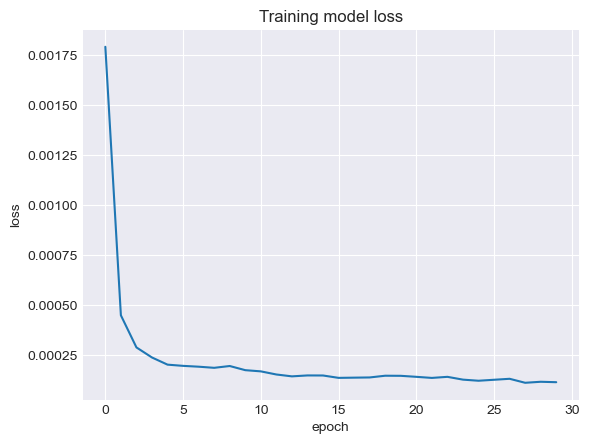

In [66]:
plt.plot(result.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [67]:
testData = pd.read_csv('Pearson_train.csv')
testData

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900
...,...,...,...,...,...,...
1650,2022-07-25,2412.25,2429.44,2387.41,2402.95,29106300
1651,2022-07-26,2289.29,2307.08,2255.66,2280.27,48503400
1652,2022-07-27,2309.14,2404.25,2296.82,2395.54,43790900
1653,2022-07-28,2385.58,2443.26,2377.34,2434.89,25807000


In [68]:
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')

testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1595, 60, 1)

In [69]:
y_pred = model.predict(X_test)
y_pred

50/50 [==============================] - 13s 145ms/step


array([[0.05120663],
       [0.05182987],
       [0.05247309],
       ...,
       [0.52270126],
       [0.5235101 ],
       [0.5240195 ]], dtype=float32)

In [70]:
# Predicted price 
p = scaler.inverse_transform(y_pred)
p

array([[1182.4764],
       [1183.6323],
       [1184.8251],
       ...,
       [2056.8066],
       [2058.3066],
       [2059.2512]], dtype=float32)

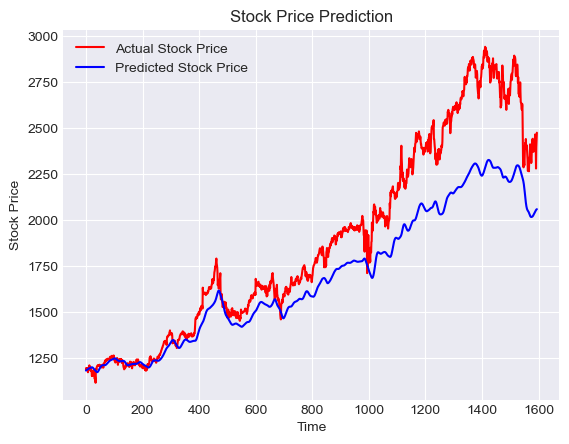

In [71]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(p, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Model 6 : Linear Regression Model

In [72]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
1,2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
2,2019-03-07,18.589333,18.980000,18.283333,18.439333,18.439333,141637500
3,2019-03-08,18.460667,19.039333,18.392668,18.942667,18.942667,132294000
4,2019-03-11,18.901333,19.418667,18.700001,19.394667,19.394667,110884500
...,...,...,...,...,...,...,...
923,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
924,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
925,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
926,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800


In [73]:
#splitting the dataset into train and test sets 
X = np.array(df.index).reshape(-1,1)
# target or dependent variable 
Y = df['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.6,random_state=101)

In [74]:
#Scaling the feature 
scaler = StandardScaler().fit(X_train)

In [75]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [76]:
A = go.Scatter(
       x = X_train.T[0],y= Y_train,
       mode = "markers",name= "Actual")
B = go.Scatter(
       x = X_train.T[0],y= model.predict(X_train).T,
       mode = "lines",name= "Predicted")
tesla_data = [A,B]
layout.xaxis.title.text = 'Date'
plot2 = go.Figure(data = tesla_data,layout=layout)

In [77]:
iplot(plot2)

In [78]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, model.predict(X_train))}\t{r2_score(Y_test, model.predict(X_test))}
{'MSE'.ljust(10)}{MSE(Y_train, model .predict(X_train))}\t{MSE(Y_test, model.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8038304326838449	0.8186934122344409
MSE       2590.218416924674	2555.263746016391



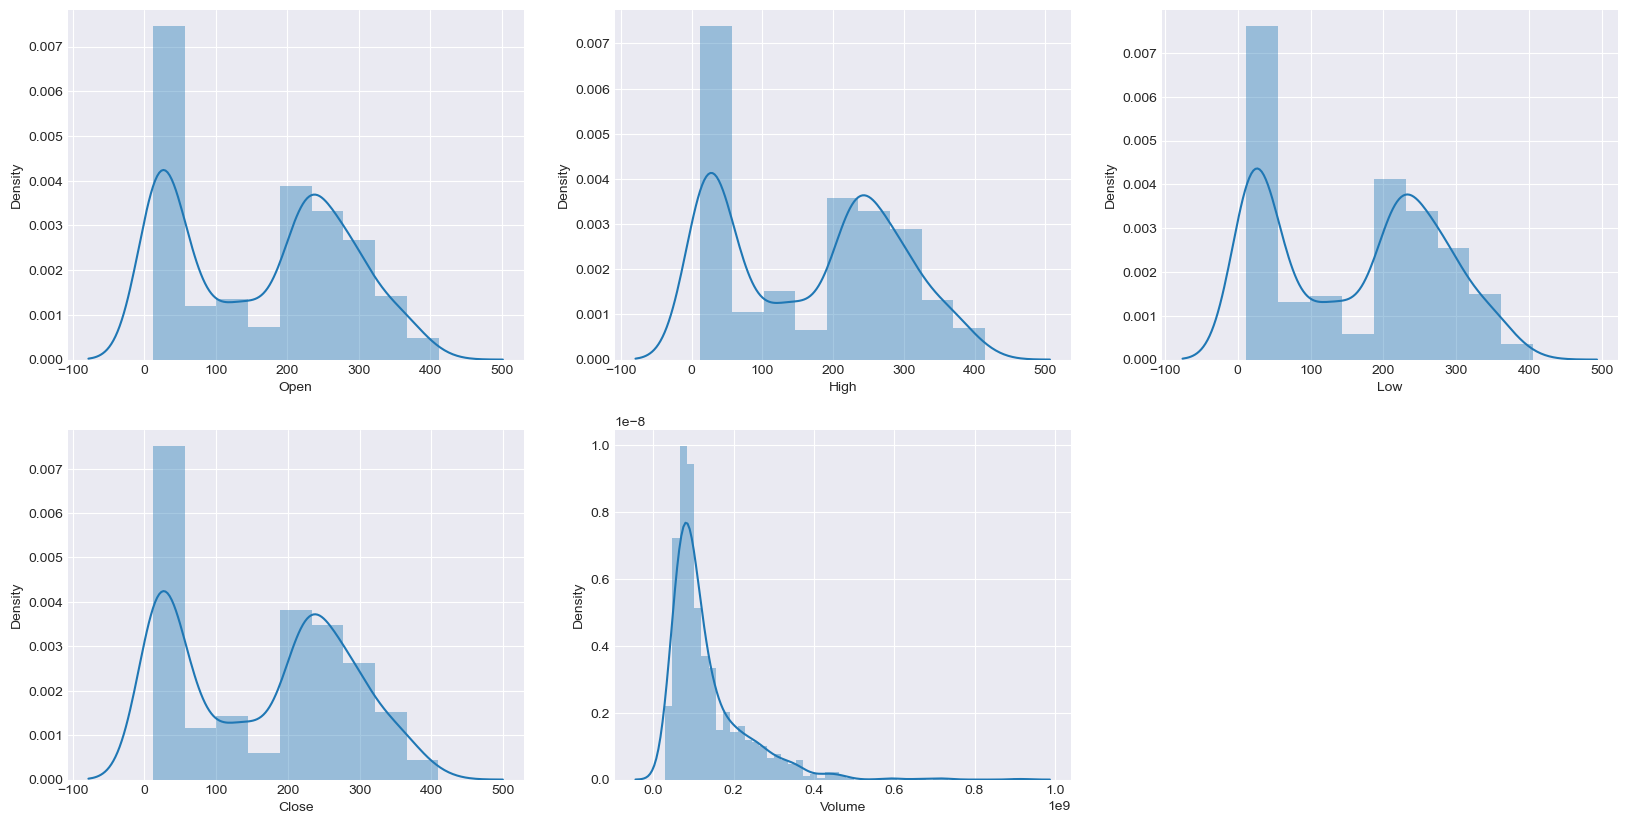

In [79]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

---
# ================================X===================================
---